# Db2 Sample For Scikit-Learn
#### Rohith Ravindranath (rohithravin@ibm.com)
In this code sample, we will show how to use the Db2 Python driver to import data from our Db2 database. Then, we will use that data to create a machine learning model with scikit-learn.

## 1. Import Data
Let's first install and import all the libraries needed for this notebook. Most important we will be installing and importing the db2 python driver `ibm_db`.

In [1]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Stored in directory: /Users/rohithravin/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now let's import our data from our data source.

In [72]:
wine = pd.read_csv('data/winequality-red.csv', sep=';') 

In [73]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Exploration

In this step, we are going to try and explore our data inorder to gain insight. We hope to be able to make some assumptions of our data before we start modeling.

In [55]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [56]:
# Minimum price of the data
minimum_price = np.amin(wine['quality'])

# Maximum price of the data
maximum_price = np.amax(wine['quality'])

# Mean price of the data
mean_price = np.mean(wine['quality'])

# Median price of the data
median_price = np.median(wine['quality'])

# Standard deviation of prices of the data
std_price = np.std(wine['quality'])

# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for housing dataset:

Minimum price: $3
Maximum price: $9
Mean price: $5.87790935075541
Median price $6.0
Standard deviation of prices: $0.8855481621683685


## 3. Data Visualization

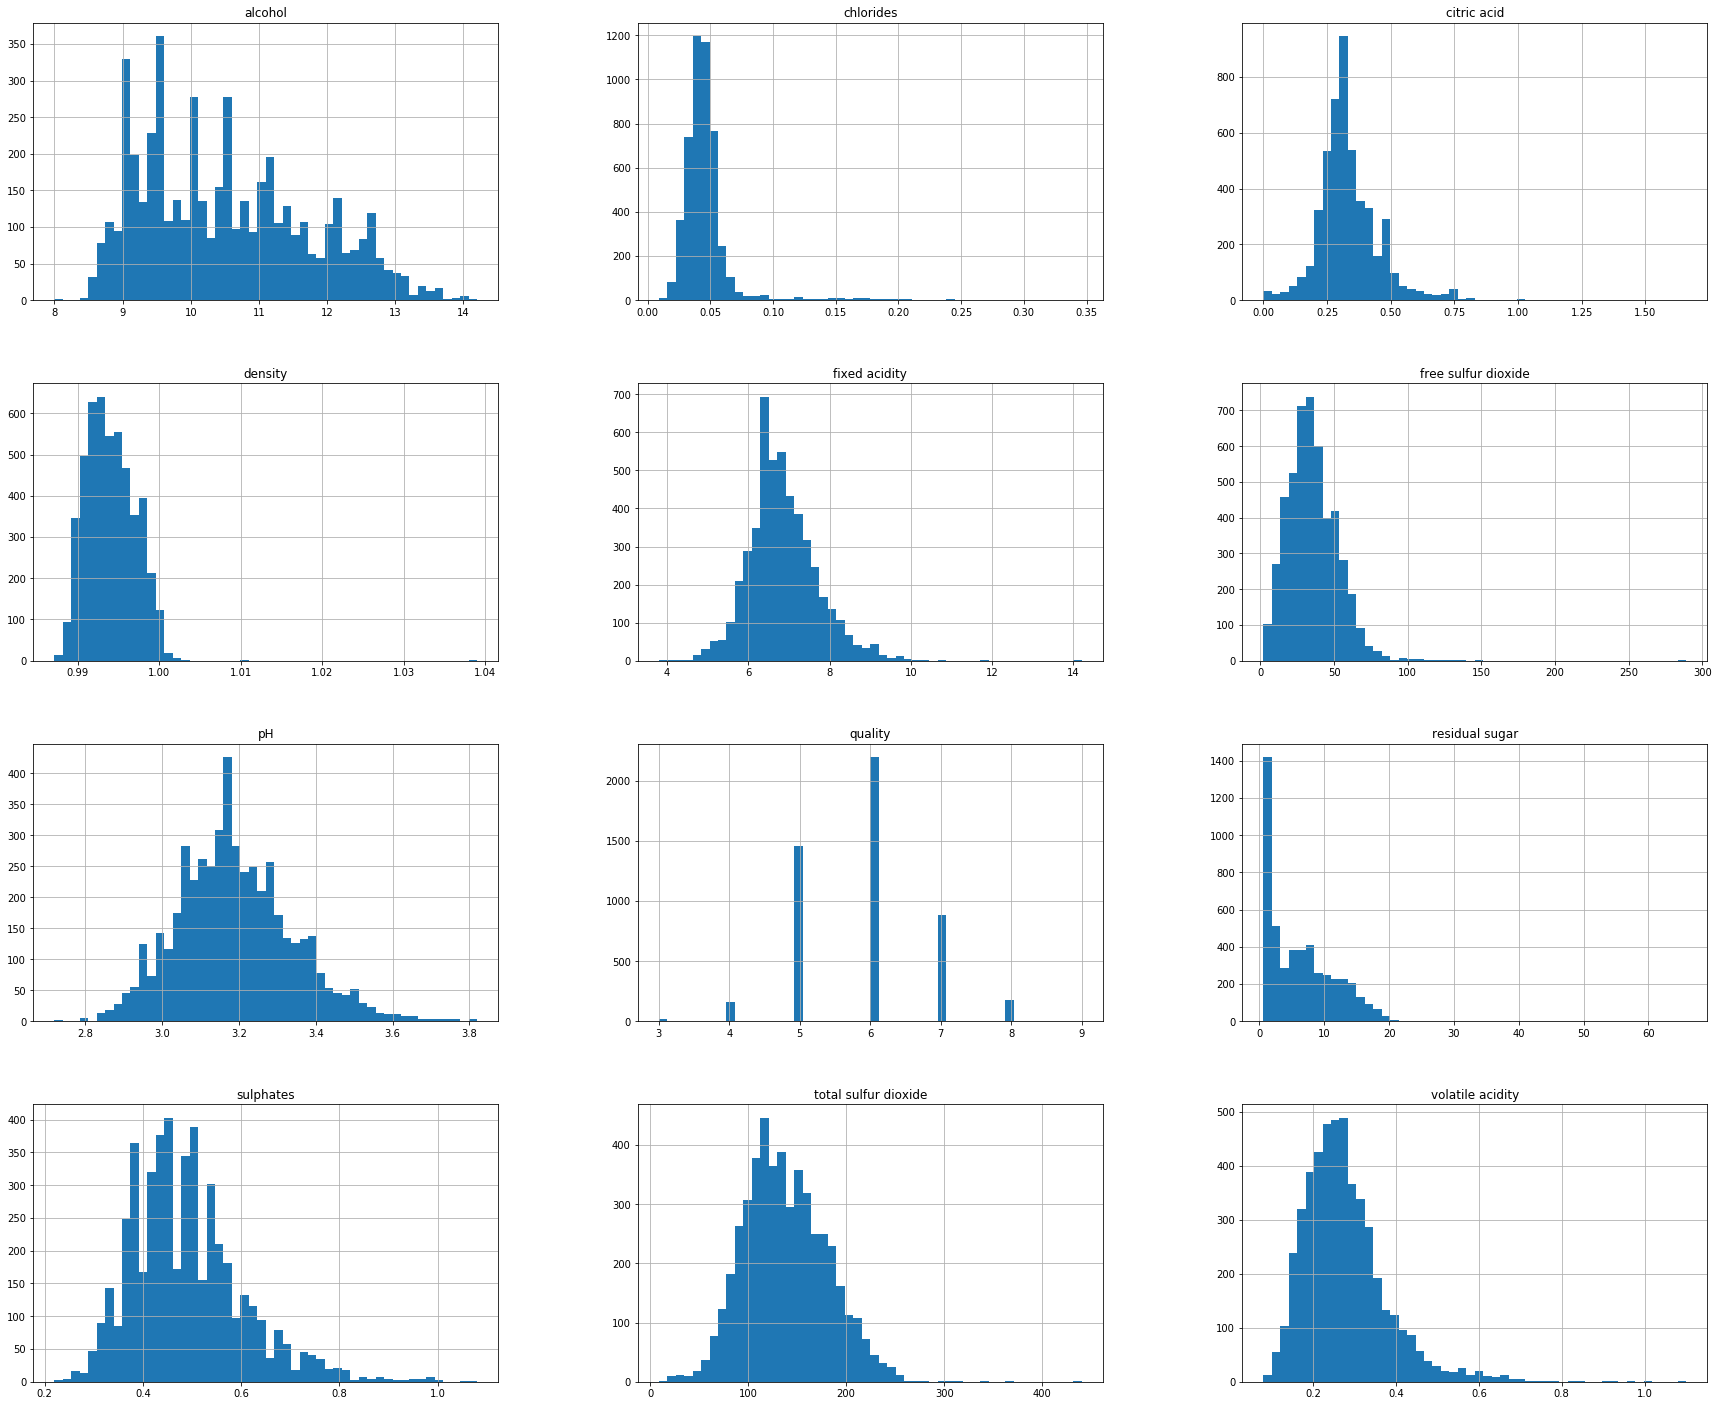

In [57]:
wine.hist(bins=50, figsize=(30,25))
plt.show()

In [58]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

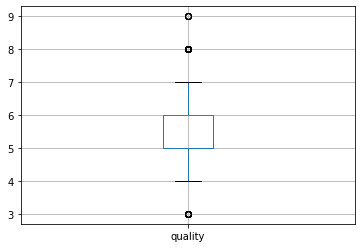

In [59]:
boxplot = wine.boxplot(column=['quality'])

## 4. Creating Machine Learning Model

Now that we have cleaned and explored our data. We are ready to build our model that will predict the attribute `quality`. 

We first pre-process our data.

In [74]:
wine_value = wine['quality']
wine_attributes = wine.drop(['quality'],  axis=1)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wine_attributes = sc.fit_transform(wine_attributes)

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
x_pca = pca.fit_transform(wine_attributes)

We need to split our data into train and test data.

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( wine_attributes,wine_value, test_size = 0.25)

We will be using Logistic Regression to model our data

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

/Users/rohithravin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohithravin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [85]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   1   4   0   0   0]
 [  0   0   6   3   0   0]
 [  0   0 134  32   1   0]
 [  0   0  57  98   2   0]
 [  0   0   6  49   3   0]
 [  0   0   0   4   0   0]]
58.75
